In [2]:
# command:
## papermill --kernel ir ggbetweenstats.ipynb ggbetweenstats.ipynb \
## -p plot_type "boxviolin" \
## -p continent_to_exclude "Asia" \
## -p year 1987

The function `ggstatsplot::ggbetweenstats` is designed to facilitate 
**data exploration**, and for making highly customizable **publication-ready plots**,
with relevant statistical details included in the plot itself if desired. We
will see examples of how to use this function in this vignette.

To begin with, here are some instances where you would want to use
`ggbetweenstats`-

 - to check if a continuous variable differs across multiple groups/conditions

 - to compare distributions visually and check for outliers

**Note**: This vignette uses the pipe operator (`%>%`), if you are not
familiar with this operator, here is a good explanation:
<http://r4ds.had.co.nz/pipes.html>

## Comparisons between groups with `ggbetweenstats`

To illustrate how this function can be used, we will use the `gapminder` dataset
throughout this vignette. This dataset provides values for life expectancy, GDP
per capita, and population, at 5 year intervals, from 1952 to 2007, for each of
142 countries (courtesy [Gapminder Foundation](https://www.gapminder.org/)).
Let's have a look at the data-

In [3]:
library(gapminder)

dplyr::glimpse(x = gapminder::gapminder)

Rows: 1,704
Columns: 6
$ country   <fct> Afghanistan, Afghanistan, Afghanistan, Afghanistan, Afghani…
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia,…
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997,…
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 40.…
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 1…
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.1134,…


**Note**: For the remainder of the vignette, we're going to exclude *Oceania*
from the analysis simply because there are so few observations (countries).

Suppose the first thing we want to inspect is the distribution of life
expectancy for the countries of a continent in 2007. We also want to know if the
mean differences in life expectancy between the continents is statistically
significant.

The simplest form of the function call is-

Registered S3 method overwritten by 'broom.mixed':
  method      from 
  tidy.gamlss broom

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 



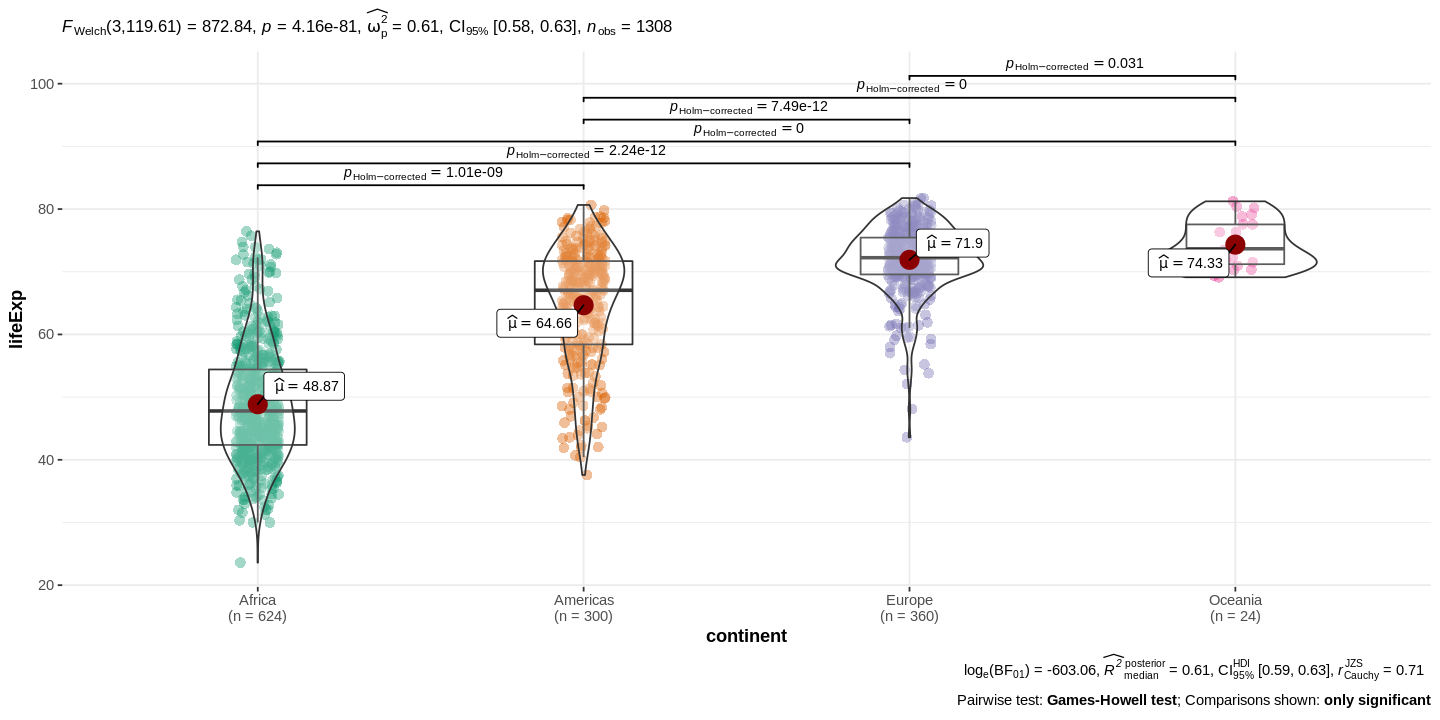

In [4]:
# since the confidence intervals for the effect sizes are computed using
# bootstrapping, important to set a seed for reproducibility
options(repr.plot.width=12, repr.plot.height=6)
set.seed(123)

# function call
ggstatsplot::ggbetweenstats(
  data = dplyr::filter(gapminder::gapminder, 
                       year == year, 
                       continent != continent_to_exclude),
  x = continent,
  y = lifeExp,
  nboot = 10,
  messages = FALSE
)

**Note**:
  
  - The function automatically decides whether an independent samples *t*-test
    is preferred (for 2 groups) or a Oneway ANOVA (3 or more groups). based on
    the number of levels in the grouping variable.
    
  - The output of the function is a `ggplot` object which means that it can be
    further modified with `ggplot2` functions.

As can be seen from the plot, the function by default returns Bayes Factor for
the test. If the null hypothesis can't be rejected with the null hypothesis
significance testing (NHST) approach, the Bayesian approach can help index
evidence in favor of the null hypothesis (i.e., $BF_{01}$).

By default, natural logarithms are shown because Bayes Factor values can
sometimes be pretty large. Having values on logarithmic scale also makes it easy
to compare evidence in favor alternative ($BF_{10}$) versus null ($BF_{01}$)
hypotheses (since $log_{e}(BF_{01}) = - log_{e}(BF_{10})$). 

We can make the output much more aesthetically pleasing as well as informative
by making use of the many optional parameters in `ggbetweenstats`. We'll add a
title and caption, better `x` and `y` axis labels, and tag and label the
outliers in the data. We can and will change the overall theme as well as the
color palette in use.

In case you would like cite this package, cite it as:
     Patil, I. (2018). ggstatsplot: "ggplot2" Based Plots with Statistical Details. CRAN.
     Retrieved from https://cran.r-project.org/web/packages/ggstatsplot/index.html



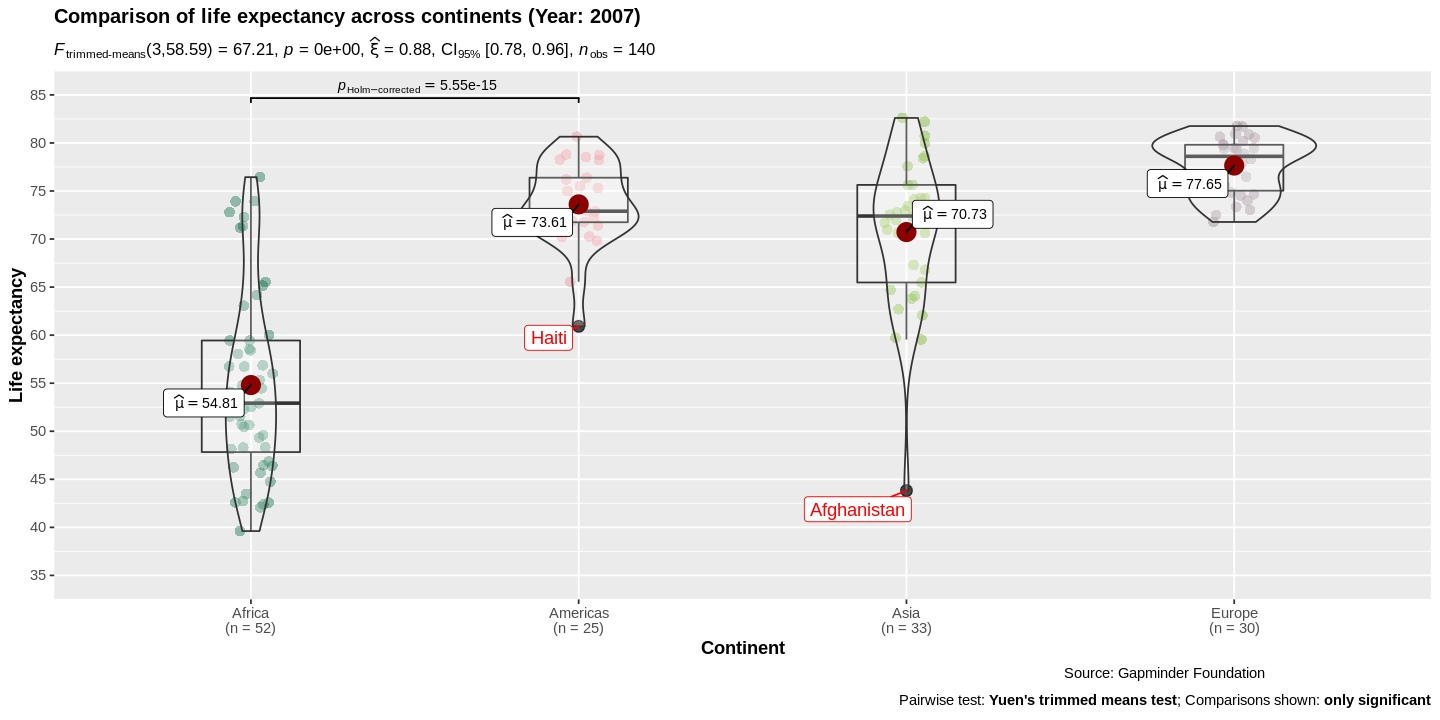

In [5]:
# for reproducibility
set.seed(123)
library(ggstatsplot)
library(gapminder)

# plot
ggstatsplot::ggbetweenstats(
  data = dplyr::filter(.data = gapminder, year == 2007, continent != "Oceania"),
  x = continent, # grouping/independent variable
  y = lifeExp, # dependent variables
  type = "robust", # type of statistics
  xlab = "Continent", # label for the x-axis
  ylab = "Life expectancy", # label for the y-axis
  plot.type = "boxviolin", # type of plot
  outlier.tagging = TRUE, # whether outliers should be flagged
  outlier.coef = 1.5, # coefficient for Tukey's rule
  outlier.label = country, # label to attach to outlier values
  outlier.label.args = list(color = "red"), # outlier point label color
  # turn off messages
  ggtheme = ggplot2::theme_gray(), # a different theme
  package = "yarrr", # package from which color palette is to be taken
  palette = "info2", # choosing a different color palette
  title = "Comparison of life expectancy across continents (Year: 2007)",
  caption = "Source: Gapminder Foundation"
) + # modifying the plot further
  ggplot2::scale_y_continuous(
    limits = c(35, 85),
    breaks = seq(from = 35, to = 85, by = 5)
  )

As can be appreciated from the effect size (partial eta squared) of 0.635, there
are large differences in the mean life expectancy across continents.
Importantly, this plot also helps us appreciate the distributions within any
given continent. For example, although Asian countries are doing much better
than African countries, on average, Afghanistan has a particularly grim average
for the Asian continent, possibly reflecting the war and the political turmoil.

So far we have only used a classic parametric test and a boxviolin plot, 
but we can also use other available options:

  - The `type` (of test) argument also accepts the following abbreviations:
    `"p"` (for *parametric*), `"np"` (for *nonparametric*), `"r"` (for
    *robust*), `"bf"` (for *Bayes Factor*). 

  - The type of plot to be displayed can also be modified (`"box"`, `"violin"`,
  or `"boxviolin"`).

  - The color palettes can be modified.

Let's use the `combine_plots` function to make one plot from four separate
plots that demonstrates all of these options. Let's compare life expectancy for
all countries for the first and last year of available data 1957 and 2007. We
will generate the plots one by one and then use `combine_plots` to merge them
into one plot with some common labeling. It is possible, but not necessarily
recommended, to make each plot have different colors or themes.

For example,

In [ ]:
?ggstatsplot::ggbetweenstats

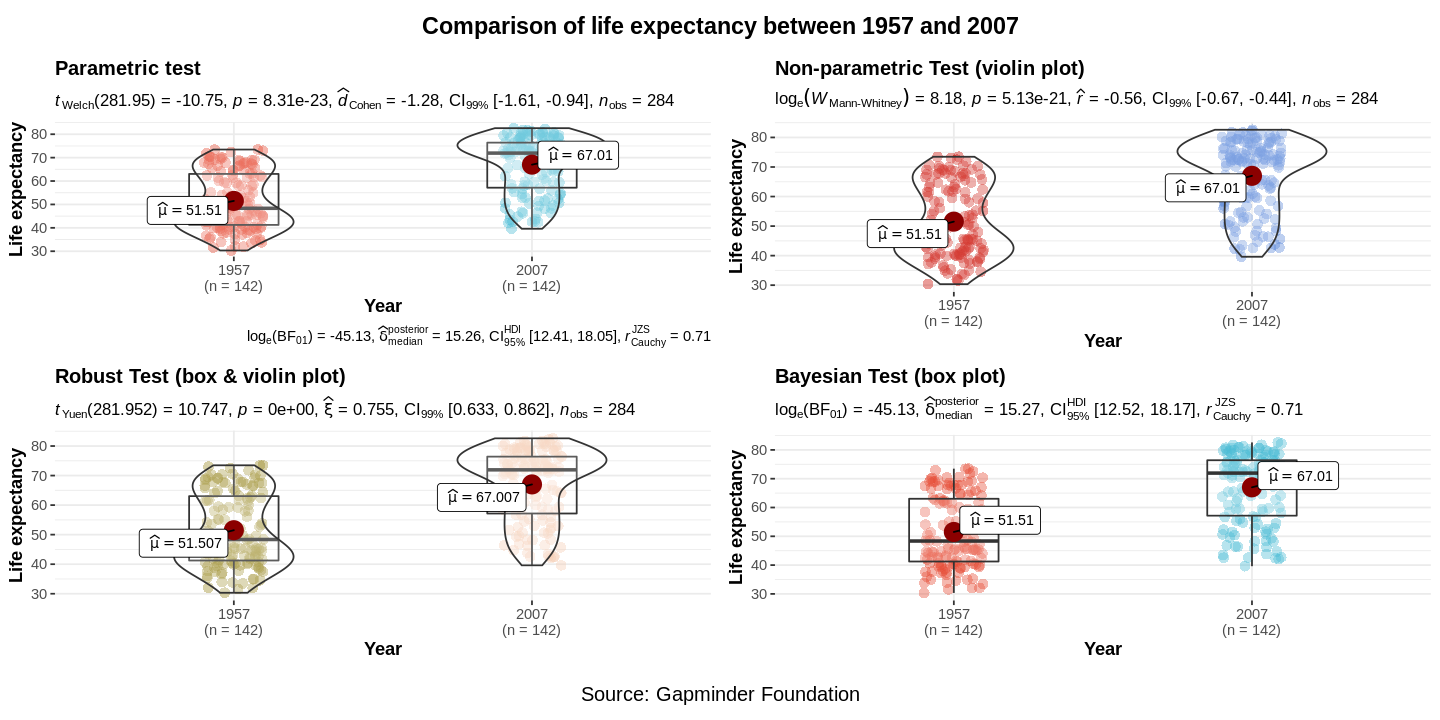

In [7]:
options(repr.plot.width=12, repr.plot.height=6)
library(ggstatsplot)
library(gapminder)

# selecting subset of the data
df_year <- dplyr::filter(.data = gapminder::gapminder, year == 2007 | year == 1957)

# for reproducibility
set.seed(123)

# parametric t-test and box plot
p1 <-
  ggstatsplot::ggbetweenstats(
    data = df_year,
    x = year,
    y = lifeExp,
    xlab = "Year",
    ylab = "Life expectancy",
    plot.type = plot_type,
    type = "p",
    effsize.type = "d",
    conf.level = 0.99,
    title = "Parametric test",
    package = "ggsci",
    palette = "nrc_npg",
    messages = FALSE
  )

# Mann-Whitney U test (nonparametric t) and violin plot
p2 <-
  ggstatsplot::ggbetweenstats(
    data = df_year,
    x = year,
    y = lifeExp,
    xlab = "Year",
    ylab = "Life expectancy",
    plot.type = "violin",
    type = "np",
    conf.level = 0.99,
    title = "Non-parametric Test (violin plot)",
    package = "ggsci",
    palette = "uniform_startrek",
    messages = FALSE
  )

# robust t-test and boxviolin plot
p3 <-
  ggstatsplot::ggbetweenstats(
    data = df_year,
    x = year,
    y = lifeExp,
    xlab = "Year",
    ylab = "Life expectancy",
    plot.type = "boxviolin",
    type = "r",
    conf.level = 0.99,
    title = "Robust Test (box & violin plot)",
    tr = 0.005,
    package = "wesanderson",
    palette = "Royal2",
    nboot = 15,
    k = 3,
    messages = FALSE
  )

# Bayes Factor for parametric t-test and boxviolin plot
p4 <-
  ggstatsplot::ggbetweenstats(
    data = df_year,
    x = year,
    y = lifeExp,
    xlab = "Year",
    ylab = "Life expectancy",
    type = "bf",
    plot.type = "box",
    title = "Bayesian Test (box plot)",
    package = "ggsci",
    palette = "nrc_npg",
    messages = FALSE
  )

# combining the individual plots into a single plot
ggstatsplot::combine_plots(
  p1, p2, p3, p4,
  nrow = 2,
  title.text = "Comparison of life expectancy between 1957 and 2007",
  caption.text = "Source: Gapminder Foundation",
  title.size = 14,
  caption.size = 12
)

## Grouped analysis with `grouped_ggbetweenstats`

What if we want to analyze both by continent and between 1957 and 2007? A
combination of our two previous efforts. 

`ggstatsplot` provides a special helper function for such instances:
`grouped_ggbetweenstats`. This is merely a wrapper function around
`ggstatsplot::combine_plots`. It applies `ggbetweenstats` across all **levels**
of a specified **grouping variable** and then combines list of individual plots
into a single plot. Note that the grouping variable can be anything: conditions
in a given study, groups in a study sample, different studies, etc.

Let's focus on the same 4 continents for the following years: 1967, 1987, 2007.
Also, let's carry out pairwise comparisons to see if there differences between
every pair of continents.

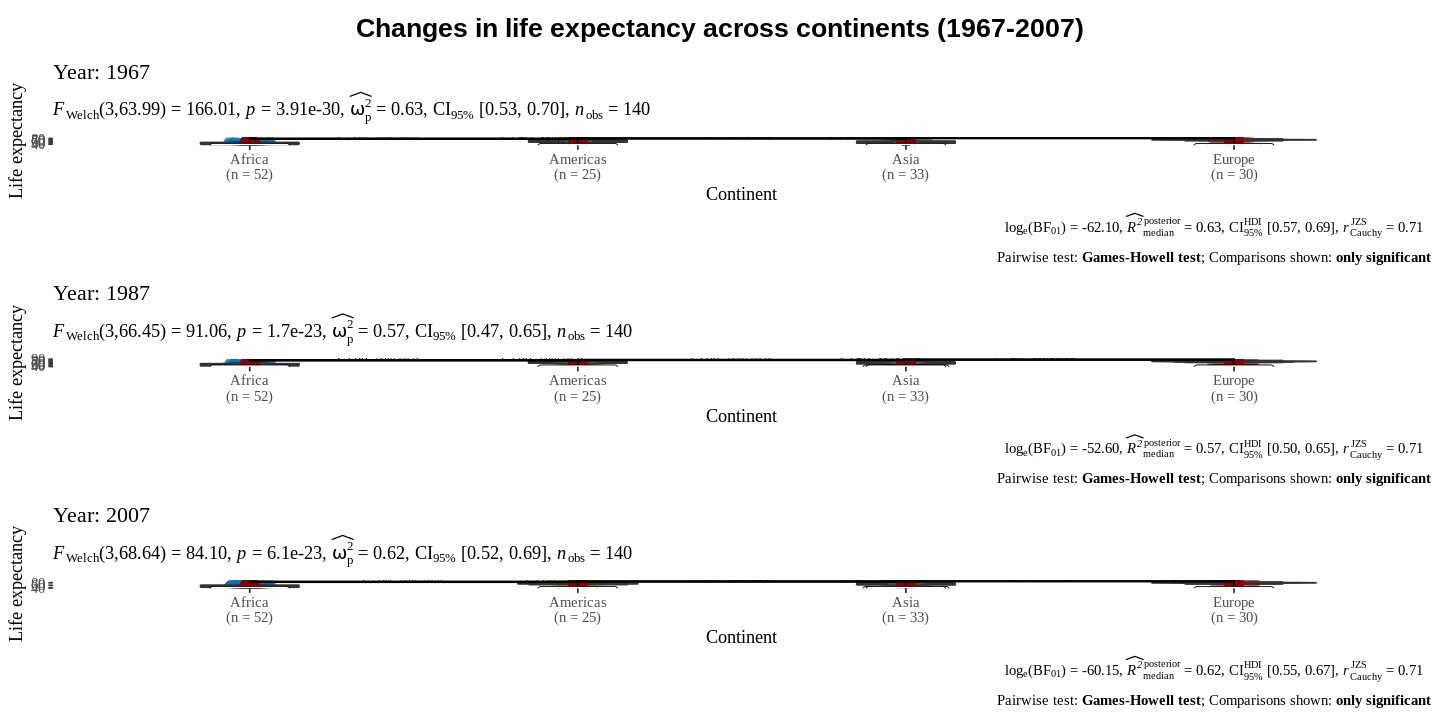

In [8]:
# for reproducibility
set.seed(123)

# select part of the dataset and use it for plotting
gapminder::gapminder %>%
  dplyr::filter(.data = ., year %in% c(1967, 1987, 2007), continent != "Oceania") %>%
  ggstatsplot::grouped_ggbetweenstats(
    # arguments relevant for ggstatsplot::ggbetweenstats
    data = .,
    x = continent,
    y = lifeExp,
    grouping.var = year,
    xlab = "Continent",
    ylab = "Life expectancy",
    pairwise.comparisons = TRUE, # display results from pairwise comparisons
    pairwise.display = "significant", # display only significant pairwise comparisons
    p.adjust.method = "fdr", # adjust p-values for multiple tests using this method
    ggtheme = ggthemes::theme_tufte(),
    package = "ggsci",
    palette = "default_jco",
    outlier.tagging = TRUE,
    ggstatsplot.layer = FALSE,
    outlier.label = country,
    title.prefix = "Year",
    # arguments relevant for ggstatsplot::combine_plots
    title.text = "Changes in life expectancy across continents (1967-2007)",
    plotgrid.args = list(nrow = 3)
  )

As seen from the plot, although the life expectancy has been improving steadily
across all continents as we go from 1967 to 2007, this improvement has not been
happening at the same rate for all continents. Additionally, irrespective of
which year we look at, we still find significant differences in life expectancy
across continents which have been surprisingly consistent across five decades
(based on the observed effect sizes).

## Grouped analysis with `ggbetweenstats` + `purrr` 

Although this grouping function provides a quick way to explore the data, it
leaves much to be desired. For example, the same type of plot and test is
applied for all years, but maybe we want to change this for different years, or
maybe we want to gave different effect sizes for different years. This type of
customization for different levels of a grouping variable is not possible with
`grouped_ggbetweenstats`, but this can be easily achieved using the `purrr`
package. 

See the associated vignette here:
<https://indrajeetpatil.github.io/ggstatsplot/articles/web_only/purrr_examples.html>

## Within-subjects designs

For repeated measures designs, `ggwithinstats` function can be used:
<https://indrajeetpatil.github.io/ggstatsplot/articles/web_only/ggwithinstats.html>

## Summary of tests

Following (between-subjects) tests are carried out for each type of analyses-

Type | No. of groups | Test | Function
----------- | --- | ------------------------- | -----
Parametric | > 2 | Fisher's or Welch's one-way ANOVA | `stats::oneway.test`
Non-parametric | > 2 | Kruskal–Wallis one-way ANOVA | `stats::kruskal.test`
Robust | > 2 | Heteroscedastic one-way ANOVA for trimmed means | `WRS2::t1way`
Bayes Factor | > 2 | Fisher's ANOVA | `BayesFactor::anovaBF`
Parametric | 2 | Student's or Welch's *t*-test | `stats::t.test`
Non-parametric | 2 | Mann–Whitney *U* test | `stats::wilcox.test`
Robust | 2 |  Yuen's test for trimmed means | `WRS2::yuen`
Bayes Factor | 2 | Student's *t*-test | `BayesFactor::ttestBF`

Following effect sizes (and confidence intervals/CI) are available for each type
of test-

Type | No. of groups | Effect size | CI? | Function
----------- | --- | ------------------------- | --- | -----
Parametric | > 2 | $\eta_{p}^2$, $\omega_{p}^2$ | <font color="green">Yes<font> | `effectsize::omega_squared`, `effectsize::eta_squared`
Non-parametric | > 2 | $\eta_{H}^2$ (*H*-statistic based eta-squared) | <font color="green">Yes<font> | `rcompanion::epsilonSquared`
Robust | > 2 | $\xi$ (Explanatory measure of effect size) | <font color="green">Yes<font> | `WRS2::t1way`
Bayes Factor | > 2 | $R_{posterior}^2$ | <font color="green">Yes<font> | `performance::r2_bayes`
Parametric | 2 | Cohen's *d*, Hedge's *g* | <font color="green">Yes<font> | `effectsize::cohens_d`, `effectsize::hedges_g`
Non-parametric | 2 | *r* (computed as $Z/\sqrt{N}$) | <font color="green">Yes<font> | `rcompanion::wilcoxonR`
Robust | 2 |  $\xi$ (Explanatory measure of effect size) | <font color="green">Yes<font> | `WRS2::yuen.effect.ci`
Bayes Factor | 2 | $\delta_{posterior}$ | <font color="green">Yes<font> | `bayestestR::describe_posterior`

Here is a summary of *multiple pairwise comparison* tests supported in
*ggbetweenstats*-

Type | Equal variance? | Test | *p*-value adjustment? | Function
----------- | --- | ------------------------- | --- | -----
Parametric | No | Games-Howell test | <font color="green">Yes</font> | `stats::pairwise.t.test`
Parametric | Yes | Student's *t*-test | <font color="green">Yes</font> | `PMCMRplus::gamesHowellTest`
Non-parametric | No | Dunn test | <font color="green">Yes</font> | `PMCMRplus::kwAllPairsDunnTest`
Robust | No | Yuen's trimmed means test | <font color="green">Yes</font> | `WRS2::lincon`
Bayes Factor | `NA` | Student's *t*-test | `NA` | `BayesFactor::ttestBF`

## Effect size interpretation

To see how the effect sizes displayed in these tests can be interpreted, see:
<https://indrajeetpatil.github.io/ggstatsplot/articles/web_only/effsize_interpretation.html>

# Suggestions

If you find any bugs or have any suggestions/remarks, please file an issue on
`GitHub`: <https://github.com/IndrajeetPatil/ggstatsplot/issues>

# Session Information

For details, see-
<https://indrajeetpatil.github.io/ggstatsplot/articles/web_only/session_info.html>